In [114]:
from nltk.corpus import stopwords
import nltk
import string
import re
import PyPDF2
from nltk import sent_tokenize
from nltk import word_tokenize
import pymorphy2
from collections import Counter

In [115]:
poem = open("poem.txt", "r").read()
science_text = open('science_text.txt', 'r').read()

In [116]:
science_text_tokenized = nltk.tokenize.sent_tokenize(science_text)
poem_tokenized = nltk.tokenize.sent_tokenize(poem)

In [117]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation + '’'))
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('russian'))
    cleaned_tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

In [118]:

morph = pymorphy2.MorphAnalyzer()


POS_tags_poem = []
for s in poem_tokenized:
    s = clean_text(s)
    for w in word_tokenize(s, language='russian', preserve_line=True):
        p = morph.parse(w)[0]
        POS_tags_poem.append(p.tag.POS)

POS_tags_scientific = []
for s in science_text_tokenized:
    s = clean_text(s)
    for w in word_tokenize(s, language='russian', preserve_line=True):
        p = morph.parse(w)[0]
        POS_tags_scientific.append(p.tag.POS)



In [119]:
POS_tags_poem_cnt = Counter(POS_tags_poem)

In [120]:
POS_tags_scientific_cnt = Counter(POS_tags_scientific)

In [121]:
POS_tags_poem_cnt.most_common()

[('NOUN', 35),
 ('VERB', 24),
 ('ADJF', 13),
 ('ADVB', 8),
 ('INFN', 5),
 ('PRTS', 2),
 ('PREP', 1),
 ('GRND', 1),
 ('NUMR', 1),
 ('PRCL', 1)]

In [122]:
POS_tags_scientific_cnt.most_common()

[('NOUN', 103),
 ('ADJF', 35),
 ('VERB', 25),
 ('INFN', 11),
 ('NPRO', 4),
 ('PRCL', 4),
 ('PRTF', 2),
 ('ADVB', 2),
 ('ADJS', 1),
 ('CONJ', 1),
 ('NUMR', 1)]

In [123]:
rel_freq_pos_science = {}
for k in POS_tags_scientific_cnt.keys():
    rel_freq_pos_science[k] = POS_tags_scientific_cnt[k] / sum(POS_tags_scientific_cnt.values())


In [124]:
rel_freq_pos_poem = {}
for k in POS_tags_poem_cnt.keys():
    rel_freq_pos_poem[k] =POS_tags_poem_cnt[k] / sum(POS_tags_poem_cnt.values())


In [125]:
from matplotlib import pyplot as plt



In [126]:
rel_freq_pos_poem

{'VERB': 0.26373626373626374,
 'NOUN': 0.38461538461538464,
 'ADVB': 0.08791208791208792,
 'ADJF': 0.14285714285714285,
 'INFN': 0.054945054945054944,
 'PREP': 0.01098901098901099,
 'GRND': 0.01098901098901099,
 'NUMR': 0.01098901098901099,
 'PRTS': 0.02197802197802198,
 'PRCL': 0.01098901098901099}

In [127]:
fig, ax = plt.subplots()

ax.bar(list(rel_freq_pos_science.keys()), list(rel_freq_pos_science.values()))
plt.show()

ValueError: '' is not a valid grammeme for this attribute. Valid grammemes: NPRO, PRTS, PRTF, INFN, CONJ, INTJ, PREP, COMP, VERB, GRND, ADJF, ADJS, PRCL, PRED, NUMR, ADVB, NOUN

<Figure size 640x480 with 1 Axes>

In [128]:
rel_freq_pos_science

{'NOUN': 0.544973544973545,
 'VERB': 0.13227513227513227,
 'NPRO': 0.021164021164021163,
 'ADJS': 0.005291005291005291,
 'INFN': 0.0582010582010582,
 'ADJF': 0.18518518518518517,
 'PRCL': 0.021164021164021163,
 'PRTF': 0.010582010582010581,
 'CONJ': 0.005291005291005291,
 'ADVB': 0.010582010582010581,
 'NUMR': 0.005291005291005291}

In [129]:
list(rel_freq_pos_science.keys())

['NOUN',
 'VERB',
 'NPRO',
 'ADJS',
 'INFN',
 'ADJF',
 'PRCL',
 'PRTF',
 'CONJ',
 'ADVB',
 'NUMR']

In [130]:
rel_freq_pos_science.values()

dict_values([0.544973544973545, 0.13227513227513227, 0.021164021164021163, 0.005291005291005291, 0.0582010582010582, 0.18518518518518517, 0.021164021164021163, 0.010582010582010581, 0.005291005291005291, 0.010582010582010581, 0.005291005291005291])

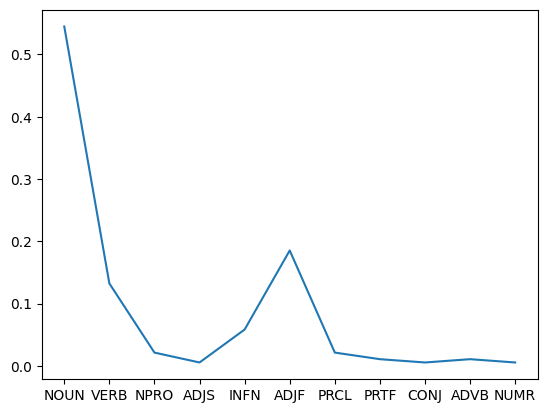

In [131]:
plt.plot(list(rel_freq_pos_science.keys()), list(rel_freq_pos_science.values()))

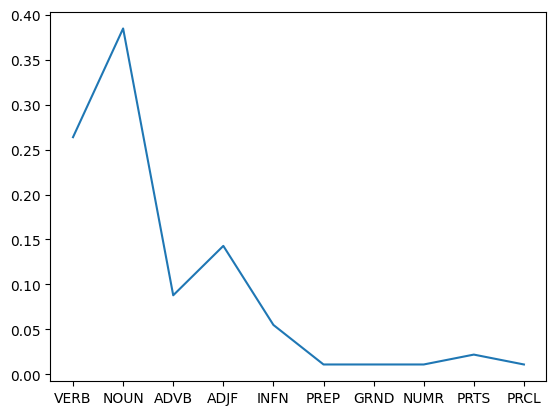

In [132]:
plt.plot(list(rel_freq_pos_poem.keys()), list(rel_freq_pos_poem.values()))

In [133]:
list(rel_freq_pos_poem.keys())

['VERB',
 'NOUN',
 'ADVB',
 'ADJF',
 'INFN',
 'PREP',
 'GRND',
 'NUMR',
 'PRTS',
 'PRCL']